<a href="https://colab.research.google.com/github/martinnghoumin/mlstuff/blob/main/BT4222_Assignment1_2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Data
Run the cell below to download the data from google drive.

# BT4222 Assignment 1 (10 marks)
## Question 1: Online Product Review Data (5 marks)
## Question 2: Chatbot (5 marks)

### Submit this .ipynb file to:  *Canvas > Assignments > Assignment 1*

### In addition, please use your NUS userID as the filename, i.e., "`a0123456.ipynb`"

In [1]:
import gdown
file_id1 = '1qn8Stn4tqg6XrisNCp8D_cIZBQjwlmpj'
url1 = f'https://drive.google.com/uc?id={file_id1}'
output1 = 'hdb_price_2017.csv'
gdown.download(url1, output1, quiet=False)

file_id2 = '1q01x9KAco1FxJQGScNgQ77ddRNjux2UL'
url2 = f'https://drive.google.com/uc?id={file_id2}'
output2 = 'Electronics_QA.json'
gdown.download(url2, output2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1qn8Stn4tqg6XrisNCp8D_cIZBQjwlmpj
To: /content/hdb_price_2017.csv
100%|██████████| 7.92M/7.92M [00:00<00:00, 41.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1q01x9KAco1FxJQGScNgQ77ddRNjux2UL
To: /content/Electronics_QA.json
100%|██████████| 122M/122M [00:00<00:00, 229MB/s]


'Electronics_QA.json'

## Question 1 Introduction

You are required to do feature engineering and format the dataset for downstream classification/regression task.

For the purposes of this assignment we will be using the Singapore HDB price dataset.

This dataset contains the HDB resale prices from 2017 onwards.

**Description of the data:**

- `hdb_price_2017.csv` contains the dataset

Columns:

- `month`: it specifies in which month did the sale happen
- `town`: in which town is the HDB in
- `flat_type`: number of rooms in the HDB
- `block`: block number of the HDB
- `street_name`: in which street is the HDB in
- `storey_range`: number of storeys in the HDB
- `floor_area_sqm`: size of the HDB flat
- `flat_model`: type of the flat sold
- `lease_commence_date`: start year of the lease
- `remaining_lease`: remaining number of years left in the lease
- `resale_price`: price at which the HDB was sold

### Import Libraries

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Add any other imports that you require


### Task 1.1 (0.2 mark)

Read `hdb_price_2017.csv` into a pandas DataFrame and answer the following question.

In [18]:
#TODO Load the CSV file into a dataframe
df = pd.read_csv('/content/hdb_price_2017.csv')
#Change the path of the csv file based on your system.
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Task 1.2 (1.3 marks)

In this part you have to visualize the data.

<font color=red>

Your task is to create a new dataframe which consists of
</font>

<font color=red>

- `flat_type`
</font>

<font color=red>

- average resale price : This should be calculated with respect to flat_type
</font>

<font color=red>

- number of units sold : This should be calculated with respect to flat_type.
</font>

<font color=red>

- You also need to plot a bubble chart with x axis as flat_type, y axis as average resale price and size as number of units.
</font>

Hint
- Use sns.scatterplot with sizes=(10, 1000) for better visualization

In [28]:
#TODO
grouped = df.groupby('flat_type')
result = grouped.agg({'resale_price': 'mean', 'flat_type': 'count'})
print(result)

                   resale_price  flat_type
flat_type                                 
1 ROOM            183899.135135         37
2 ROOM            232809.029839       1240
3 ROOM            307468.115133      19420
4 ROOM            434003.756724      33282
5 ROOM            529469.576041      19947
EXECUTIVE         625121.420314       6411
MULTI-GENERATION  800258.162162         37


          flat_type   resale_price  no_of_units
0            1 ROOM  183899.135135           37
1            2 ROOM  232809.029839         1240
2            3 ROOM  307468.115133        19420
3            4 ROOM  434003.756724        33282
4            5 ROOM  529469.576041        19947
5         EXECUTIVE  625121.420314         6411
6  MULTI-GENERATION  800258.162162           37


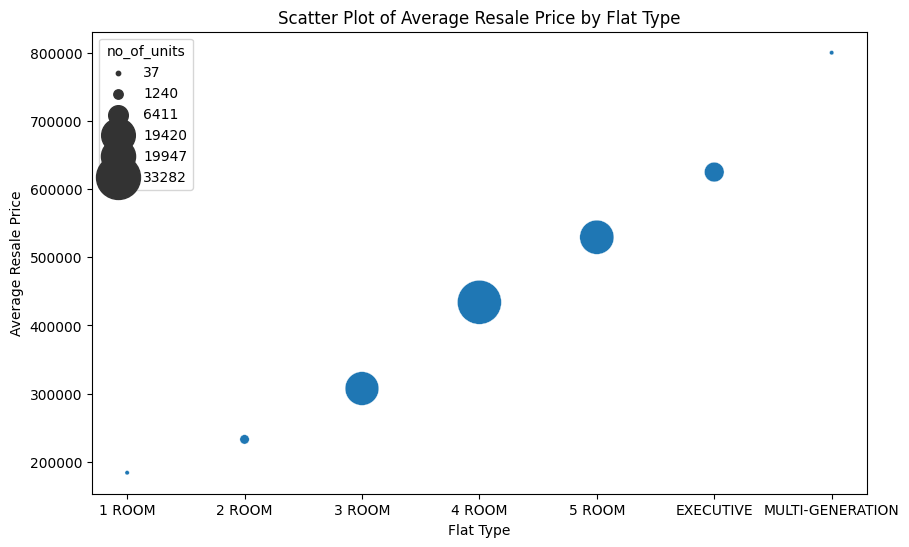

In [29]:
#Visualization
import seaborn as sns
result = result.rename(columns={'flat_type': 'no_of_units'})
result = result.reset_index()
print(result)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=result, x='flat_type', y='resale_price', size='no_of_units', sizes=(10, 1000))
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.title('Scatter Plot of Average Resale Price by Flat Type')
plt.show()

### Task 1.3 (0.5 marks)

<font color='red'>

- Your task is to extract top 5 towns that have the highest number of sales and plot the result in a bar chart.
</font>

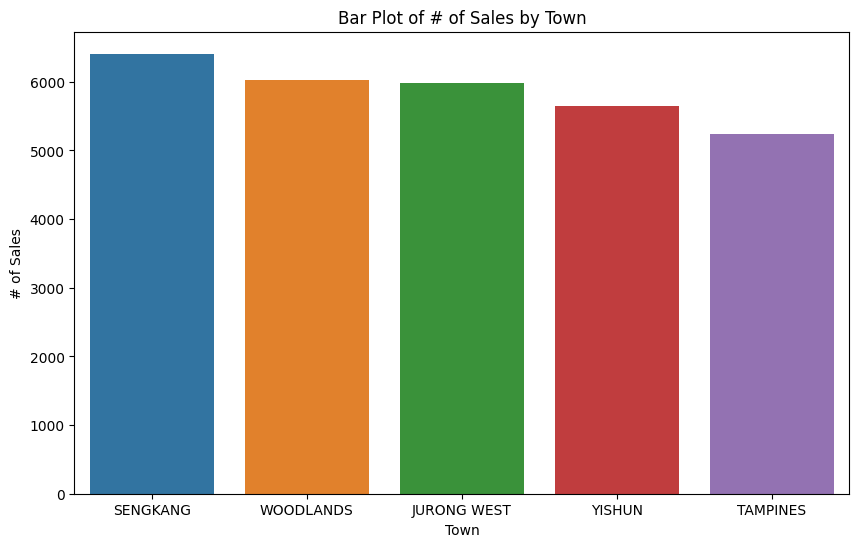

In [38]:
# TODO Find out top 5 towns with most number of sales
grouped2 = df.groupby('town')
result2 = grouped2.agg({'block':'count'})
result2_sorted = result2.sort_values(by='block', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=result2_sorted.head(), x='town', y='block')
plt.xlabel('Town')
plt.ylabel('# of Sales')
plt.title('Bar Plot of # of Sales by Town')
plt.show()

### Task 1.4 (0.5 marks)

To make our task simpler I have selected `town`, `floor_area_sqm`, `flat_model`, `remaining_lease` as our features to predict `resale_price`.

<font color='red'>

- Your task is to check if there are any null values in the DataFrame and drop the rows.
</font>


In [39]:
new_columns = ['town', 'floor_area_sqm', 'remaining_lease', 'flat_model', 'resale_price']
df = df[new_columns]

df.head()

,town,floor_area_sqm,remaining_lease,flat_model,resale_price
0,ANG MO KIO,44.0,61 years 04 months,Improved,232000.0
1,ANG MO KIO,67.0,60 years 07 months,New Generation,250000.0
2,ANG MO KIO,67.0,62 years 05 months,New Generation,262000.0
3,ANG MO KIO,68.0,62 years 01 month,New Generation,265000.0
4,ANG MO KIO,67.0,62 years 05 months,New Generation,265000.0


In [44]:
#TODO Check if there are any NA values in the dataframe and drop if any.
missing_values = df.isna()

#Remove drop na values
df_cleaned = df.dropna()
df_cleaned.head()

,town,floor_area_sqm,remaining_lease,flat_model,resale_price
0,ANG MO KIO,44.0,61 years 04 months,Improved,232000.0
1,ANG MO KIO,67.0,60 years 07 months,New Generation,250000.0
2,ANG MO KIO,67.0,62 years 05 months,New Generation,262000.0
3,ANG MO KIO,68.0,62 years 01 month,New Generation,265000.0
4,ANG MO KIO,67.0,62 years 05 months,New Generation,265000.0


### Task 1.5 (0.5 marks)

<font color='red'>

- Define X (features) and y (target) from the DataFrame, and then split X and y into training and testing sets, using the `town`, `floor_area_sqm`,  `remaining_lease` and `flat_model` as the only features and the `resale_price` as the target variable.
</font>
* **hint**: use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Set `test_size=0.2`, `random_state`=42, `shuffle=True`.

Note: The stratify argument in `train_test_split` will not apply here since our target feature is not categorical.

In [73]:
# TODO split the dataframe into X_train, X_test, y_train, y_test

X = df[['town', 'floor_area_sqm', 'remaining_lease', 'flat_model']]
y = df['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

### Task 1.6 (1 mark)
<font color='red'>

- Use one-hot encoding to process the feature `town`, `flat_model`.
</font>

<font color='red'>

- The output will be a sparse matrix, but you need to convert it to an array.
</font>

<font color='red'>

- You need to apply one-hot encoding to X_train and X_test.
</font>


- **Hint**: Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of one hot encoding.



In [74]:
#TODO perform one hot encoding for town and flat_model categorical variables.
# Encoding should be done for both X_train and X_test
enc = OneHotEncoder(categories='auto')
columns_to_encode = ['town', 'flat_model']
features_train = enc.fit_transform(X_train[columns_to_encode]).toarray()
features_test = enc.transform(X_test[columns_to_encode]).toarray()

In [75]:
#TODO Add the one hot encoded arrays into X_train and X_test respectively.
features_train_df = pd.DataFrame(features_train)
X_train = pd.concat([X_train, features_train_df], axis=1)
features_test_df = pd.DataFrame(features_test)
X_test = pd.concat([X_test, features_test_df], axis=1)

In [76]:
# Deleting the original town and flat_model features from X_train and X_test.

del X_train['town']
del X_train['flat_model']

del X_test['town']
del X_test['flat_model']

X_train
X_test

,floor_area_sqm,remaining_lease,0,1,2,3,4,5,6,7,...,36,37,38,39,40,41,42,43,44,45
78124,114.0,54 years 05 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20052,100.0,80 years 02 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71383,84.0,64 years 02 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,67.0,67 years 04 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18795,125.0,81 years 07 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16067,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16068,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16069,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16070,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2: Introduction

You are required to create a chatbot using the concepts of vectorization and cosine similarity. For the purposes of the chatbot that you will create, you will be using a repository of questions and answers gathered from
online shopping website for electronic items. Being trained on Q&A data for electronic items,your chatbot could be deployed as automated Q&A support under the Electronic Items section. The corpus **Electronics_QA.json** is in a JavaScript Object Notation (JSON)-like format. It contains multiple features for each pair of Q&A, but you will only use the feautres **question** and **answer**.

### Import libraries

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import nltk
import re
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer

#library for loading json file
import ast

# import other libraries/functions if they are needed in your coding

### Task 2.1 (1 mark)

<font color='red'>

- You need to import the corpus (**Electronics_QA.json**) into Python and read the file as a text file and then use the ast library's `literal_eval` function or json library's `load` to convert the rows from a string to a Python dictionary. (0.5 mark)
- Then you need to store questions and answers in **separate** lists. While importing, please perform the necessary preprocessing step of converting all characters to lowercase. (0.5 mark)
</font>

In [ ]:
questions = []
answers = []

#TODO read the json file and store the values in "questions" and "answers" list.



### Task 2.2 (1 mark)
<font color='red'>

- Your task is to remove digits and special characters from the questions.
</font>

<font color='red'>

- You also need to use `PorterStemmer` to perform stemming on the questions.
</font>

<font color='red'>

- Complete the function `process_questions`. The function takes in a single question and outputs processed question with stemmed words and without any digits and special characters.
</font>


Hint:

- Use [re.sub](https://docs.python.org/3/library/re.html) to remove digits and special characters.
- Concept of [Stemming](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) and how to [perform](https://www.nltk.org/howto/stem.html) it.

Note:

- Ensure that the final processed string does not contain any characters other than letters and whitespaces.


In [ ]:
def process_questions(question):
  new_question = ""

  #TODO remove special characters

  #TODO remove digits

  #Perform stemming

  return new_question

In [ ]:
#Pre processing every question in the list.
#This can take upto 3mins

processed_questions = []
for question in questions:
  processed_questions.append(process_questions(question))

### Task 2.3 (0.5 mark)
<font color='red'>

- Use `CountVectorizer` module of the sklearn library to convert the questions list into a sparse matrix and apply TF-IDF transformation. This will generate a repository matrix.
</font>


* **Hint**: You should exclude stopwords when using CountVertorizer module.

In [ ]:
#TODO

### Task 2.4 (1.5 marks)

Your repository matrix generated in Task 2.3 will be searched every time a new question is entered in the chatbot in order to find the most similar question. To implement this, please create your own function `conversation` here including the following steps:

<font color='red'>

- Calculate the angle between every row of the repository matrix and the new question vector. Use the sklearn library's `cosine_similarity` module to calculate the cosine between each row and the vector, and then convert the cosine into degrees by using numpy library's function `rad2deg`. (1 mark)
</font>

<font color='red'>

- Search the row that has the maximum cosine (or the minimum angle) with the new question vector and return the corresponding answer to that question as the response. If the smallest angle between the question vector and every row of the matrix is greater than a threshold value, i.e., 60,then you consider that question to be different enough and return a message that states the chatbot cannot understand the question. (1 mark)
</font>


* **Hint**:
- You need to transform the input question (im) to repository matrix using the previous fit CountVectorizer generated in Task 2.3.
- You need to use np.arccos to get the radian before using np.rad2deg.

In [ ]:
#TODO Complete the function conversation

def conversation(im):
  return

### Task 2.5 (1.5 marks)

Implement the chat, wherein

<font color='red'>

- The user enters their username and the chatbot will respond by greeting the user. (0.3 mark)
</font>

<font color='red'>

- The chat is initiated with the user asking questions and the bot providing a response based on the `conversation` function created in Task 2.3. (0.5 mark)
</font>

<font color='red'>

- The chat continues until the user types 'bye'.(0.2 mark)
</font>

<font color='red'>

- Please demonstrate the interactions with your chatbot using the functions that you have generated.(0.5 mark)
</font>


Example Conversation
```
Bot > Enter your username.
User > Ron
Bot > Hello Ron! Welcome to XYZ Chatbot
User > Query 1 ?
Bot > Reply 1
User > Query 2 ?
Bot > Reply 2
:
User > Bye
Bot > Bye
```


In [ ]:
#TODO Complete the function main

def main():
  return

In [ ]:
main()